In [1]:
import png
import os
import numpy as np
import matplotlib.pyplot as plt
import keras

/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing data 

In [2]:
def import_train_images():
    train_images=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/train')
    print(files)
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/train/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image[0:139320]                  #cut end of big images
        image=image.reshape((258,540))
        train_images.append(image)
    return(train_images)

In [3]:
def import_train_labels():
    train_labels=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/train_cleaned')
    print(files)
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/train_cleaned/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image[0:139320]                  #cut end of big images
        image=image.reshape((258,540))
        train_labels.append(image)
    return(train_labels)   

In [4]:
train_images=import_train_images()


['194.png', '167.png', '12.png', '177.png', '14.png', '198.png', '51.png', '110.png', '164.png', '161.png', '180.png', '149.png', '59.png', '24.png', '54.png', '176.png', '213.png', '162.png', '50.png', '179.png', '138.png', '101.png', '15.png', '26.png', '57.png', '90.png', '45.png', '159.png', '117.png', '72.png', '71.png', '74.png', '125.png', '155.png', '104.png', '182.png', '207.png', '129.png', '122.png', '6.png', '141.png', '158.png', '183.png', '137.png', '78.png', '120.png', '17.png', '9.png', '95.png', '215.png', '132.png', '174.png', '195.png', '96.png', '84.png', '206.png', '200.png', '204.png', '36.png', '140.png', '68.png', '203.png', '98.png', '168.png', '21.png', '11.png', '119.png', '173.png', '80.png', '23.png', '102.png', '156.png', '33.png', '131.png', '186.png', '30.png', '20.png', '201.png', '42.png', '89.png', '188.png', '66.png', '210.png', '152.png', '147.png', '53.png', '114.png', '143.png', '165.png', '32.png', '123.png', '150.png', '75.png', '126.png', '116.

In [5]:
train_labels=import_train_labels()

['194.png', '167.png', '12.png', '177.png', '14.png', '198.png', '51.png', '110.png', '164.png', '161.png', '180.png', '149.png', '59.png', '24.png', '54.png', '176.png', '213.png', '162.png', '50.png', '179.png', '138.png', '101.png', '15.png', '26.png', '57.png', '90.png', '45.png', '159.png', '117.png', '72.png', '71.png', '74.png', '125.png', '155.png', '104.png', '182.png', '207.png', '129.png', '122.png', '6.png', '141.png', '158.png', '183.png', '137.png', '78.png', '120.png', '17.png', '9.png', '95.png', '215.png', '132.png', '174.png', '195.png', '96.png', '84.png', '206.png', '200.png', '204.png', '36.png', '140.png', '68.png', '203.png', '98.png', '168.png', '21.png', '11.png', '119.png', '173.png', '80.png', '23.png', '102.png', '156.png', '33.png', '131.png', '186.png', '30.png', '20.png', '201.png', '42.png', '89.png', '188.png', '66.png', '210.png', '152.png', '147.png', '53.png', '114.png', '143.png', '165.png', '32.png', '123.png', '150.png', '75.png', '126.png', '116.

In [6]:
train_images[1]

array([[239, 233, 231, ..., 169, 176, 186],
       [232, 233, 231, ..., 150, 160, 180],
       [235, 238, 236, ..., 157, 151, 154],
       ...,
       [208, 207, 210, ..., 193, 190, 196],
       [210, 214, 221, ..., 194, 199, 212],
       [219, 222, 224, ..., 192, 207, 221]], dtype=uint8)

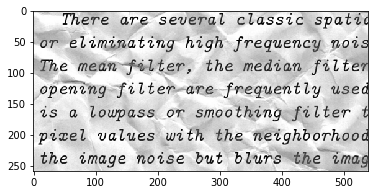

In [7]:
plt.imshow(train_images[50], cmap='gray')

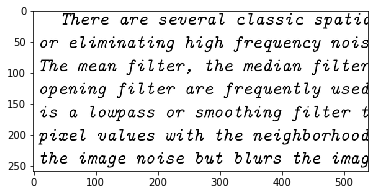

In [8]:
plt.imshow(train_labels[50], cmap='gray')

# Normalizing data

In [9]:
train_images=np.array(train_images)
train_images=train_images.astype('float32')/255
train_labels=np.array(train_labels)
train_labels=train_labels.astype('float32')/255


In [10]:
train_images[1]

array([[0.9372549 , 0.9137255 , 0.90588236, ..., 0.6627451 , 0.6901961 ,
        0.7294118 ],
       [0.9098039 , 0.9137255 , 0.90588236, ..., 0.5882353 , 0.627451  ,
        0.7058824 ],
       [0.92156863, 0.93333334, 0.9254902 , ..., 0.6156863 , 0.5921569 ,
        0.6039216 ],
       ...,
       [0.8156863 , 0.8117647 , 0.8235294 , ..., 0.75686276, 0.74509805,
        0.76862746],
       [0.8235294 , 0.8392157 , 0.8666667 , ..., 0.7607843 , 0.78039217,
        0.83137256],
       [0.85882354, 0.87058824, 0.8784314 , ..., 0.7529412 , 0.8117647 ,
        0.8666667 ]], dtype=float32)

# Convolutional Input

In [11]:
from keras import backend as K

In [12]:
rows = 258
cols = 540
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, rows, cols)
    train_labels = train_labels.reshape(train_labels.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    train_images = train_images.reshape(train_images.shape[0], rows, cols, 1)
    train_labels = train_labels.reshape(train_labels.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)

In [13]:
input_shape

(258, 540, 1)

# Creating Model

In [14]:
from keras import models
from keras import layers

In [15]:
network = models.Sequential()
network.add(layers.Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
network.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Dropout(0.25))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(1, (3, 3), activation='sigmoid',padding='same'))


In [16]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 258, 540, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 258, 540, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 258, 540, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 258, 540, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 258, 540, 256)     295168    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 258, 540, 256)     590080    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 258, 540, 256)     590080    
__________

In [17]:
network2 = keras.utils.multi_gpu_model(network,gpus=2) #model for 2 GPUs

# Compiling Model

In [18]:
sgd=keras.optimizers.SGD(momentum=0.8)
network.compile(optimizer=sgd,loss=keras.losses.mean_squared_error,metrics=['accuracy'])
network2.compile(optimizer=sgd,loss=keras.losses.mean_squared_error,metrics=['accuracy'])

In [19]:
earlystop=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=10)
history = network2.fit(train_images, train_labels,batch_size=5,shuffle=True,epochs=300,validation_split=0.2, callbacks=[earlystop])

Train on 115 samples, validate on 29 samples
Epoch 1/300
115/115 [==============================] - 55s 476ms/step - loss: 0.2267 - acc: 0.5166 - val_loss: 0.0778 - val_acc: 0.6858
Epoch 2/300
115/115 [==============================] - 50s 437ms/step - loss: 0.0721 - acc: 0.6899 - val_loss: 0.0741 - val_acc: 0.6858
Epoch 3/300
115/115 [==============================] - 51s 441ms/step - loss: 0.0714 - acc: 0.6899 - val_loss: 0.0741 - val_acc: 0.6858
Epoch 4/300
115/115 [==============================] - 50s 439ms/step - loss: 0.0713 - acc: 0.6899 - val_loss: 0.0739 - val_acc: 0.6858
Epoch 5/300
115/115 [==============================] - 51s 447ms/step - loss: 0.0712 - acc: 0.6899 - val_loss: 0.0737 - val_acc: 0.6858
Epoch 6/300
115/115 [==============================] - 51s 444ms/step - loss: 0.0710 - acc: 0.6899 - val_loss: 0.0735 - val_acc: 0.6858
Epoch 7/300
115/115 [==============================] - 51s 442ms/step - loss: 0.0708 - acc: 0.6899 - val_loss: 0.0732 - val_acc: 0.6858
Epo

Epoch 120/300
115/115 [==============================] - 51s 440ms/step - loss: 0.0030 - acc: 0.7163 - val_loss: 0.0032 - val_acc: 0.7127
Epoch 121/300
115/115 [==============================] - 50s 436ms/step - loss: 0.0030 - acc: 0.7163 - val_loss: 0.0032 - val_acc: 0.7127
Epoch 122/300
115/115 [==============================] - 51s 439ms/step - loss: 0.0031 - acc: 0.7162 - val_loss: 0.0040 - val_acc: 0.7128
Epoch 123/300
115/115 [==============================] - 51s 442ms/step - loss: 0.0030 - acc: 0.7162 - val_loss: 0.0033 - val_acc: 0.7126
Epoch 124/300
115/115 [==============================] - 51s 439ms/step - loss: 0.0030 - acc: 0.7162 - val_loss: 0.0032 - val_acc: 0.7127
Epoch 125/300
115/115 [==============================] - 50s 438ms/step - loss: 0.0029 - acc: 0.7162 - val_loss: 0.0036 - val_acc: 0.7128
Epoch 126/300
115/115 [==============================] - 51s 444ms/step - loss: 0.0029 - acc: 0.7163 - val_loss: 0.0031 - val_acc: 0.7127
Epoch 127/300
115/115 [===========

KeyboardInterrupt: 

In [20]:
import h5py               #save the network for 1 gpu
network.set_weights(network2.get_weights())
network.save('trained_network_2.h5')

In [32]:
result=network2.predict(np.array([train_images[2]]))

In [33]:
result

array([[[[0.8133559 ],
         [0.9437305 ],
         [0.9679626 ],
         ...,
         [0.8687577 ],
         [0.79972875],
         [0.6663922 ]],

        [[0.884567  ],
         [1.0355055 ],
         [1.0006764 ],
         ...,
         [0.9854114 ],
         [0.9491077 ],
         [0.7485227 ]],

        [[0.95533335],
         [1.0559839 ],
         [0.98708427],
         ...,
         [0.9075823 ],
         [0.9041367 ],
         [0.7613063 ]],

        ...,

        [[0.9206922 ],
         [1.0222037 ],
         [0.9780363 ],
         ...,
         [0.98288274],
         [1.0221722 ],
         [0.9211025 ]],

        [[0.8349103 ],
         [0.99073446],
         [0.9881896 ],
         ...,
         [1.003976  ],
         [1.0070016 ],
         [0.91017056]],

        [[0.73210067],
         [0.8973985 ],
         [0.94172454],
         ...,
         [0.9863397 ],
         [0.9368528 ],
         [0.8191817 ]]]], dtype=float32)

In [34]:
result=result*255
result=result.astype('uint8')
result=result.reshape(258,540)

In [35]:
result

array([[207, 240, 246, ..., 221, 203, 169],
       [225,   8, 255, ..., 251, 242, 190],
       [243,  13, 251, ..., 231, 230, 194],
       ...,
       [234,   4, 249, ..., 250,   4, 234],
       [212, 252, 251, ...,   0,   0, 232],
       [186, 228, 240, ..., 251, 238, 208]], dtype=uint8)

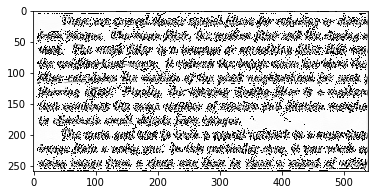

In [36]:
plt.imshow(result, cmap='gray')

In [26]:
#trainet until 160 epochs